In [ ]:

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1fz3WUFO1y6fHN9j72mJ64AAdbjKtyEwh' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweet_data.csv')

In [ ]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('tweet_data.csv')
df.sample(10)

,textID,tweet_text,sentiment
15140,1752351016,goin ta bed now! goodnite jessica,positive
3615,1961747724,@jen4buz How inconsiderate!,negative
15594,1752619250,@duherica Thanks!,positive
14838,1752124708,@DarryleP I guess that's true!,positive
11399,1694812881,3oh!3 on the radio they were amazing yesterday.,positive
10521,1694401492,"@_elj Appreciated,uni email is helpful..",positive
10869,1694550794,"morning world, is raining 2day so revision don...",positive
18512,1753838210,@sammihouse awww lol yh it is worth it- mcfl...,positive
13406,1750999744,Happy Mother's day to MOMMY,positive
12339,1695407648,@cuddle_bug68 Bill is super!! Thanks you!!,positive


In [ ]:
print('Number of Records: {}'.format(len(df)))

Number of Records: 18727


Print a tweet and ist sentiment based on id


In [ ]:

tweet_id = 125
tweet = df.iloc[tweet_id]

In [ ]:
print("Tweet: {}".format(tweet['tweet_text']))
print("Tweet sentiment: {}".format(tweet['sentiment']))


Tweet: i HATE when i see pregnant women smokinggg!!!! its sooo irresponsible n selfish! its saaad. ultimately, the baby is the one who suffers.
Tweet sentiment: negative


Index(['textID', 'tweet_text', 'sentiment'], dtype='object')


In [ ]:
import matplotlib.pyplot as plt

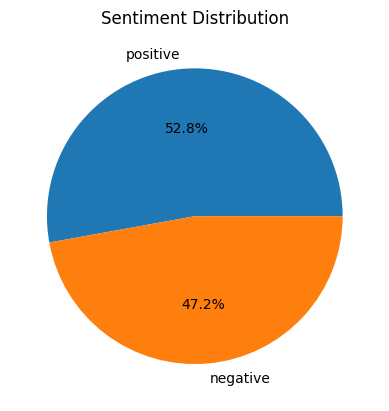

In [ ]:
sentiment_count = df['sentiment'].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%1.1f%%');
plt.title('Sentiment Distribution')
plt.show()

# ***Wordclouds***
The `Wordclouds` package is very useful to get a quick overview of most recurrent words in the text corpus

In [ ]:
from wordcloud import WordCloud

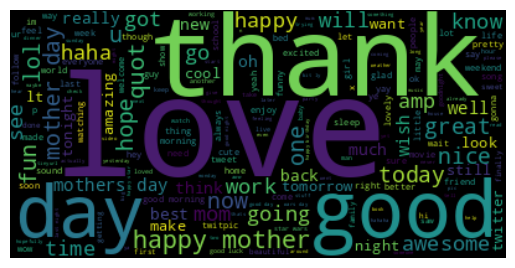

In [ ]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

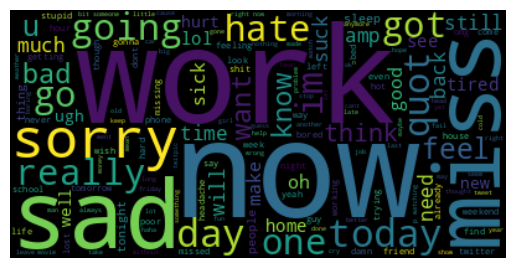

In [ ]:
neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Text** **Normalization**

In [ ]:
import re #import regex package

In [ ]:
#Example
tweet = "RT @AIOutsider I like this! 👍 https://AIOutsider.com #NLP #Fun"

**Handle** **RT**

In [ ]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

**Handle User Tag**

In [ ]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @AIOutsider I like this! 👍 https://AIOutsider.com #NLP #Fun


In [ ]:
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser I like this! 👍 https://AIOutsider.com #NLP #Fun


# **Emoji**

In [ ]:
pip install emoji --upgrade


In [ ]:
import emoji

In [ ]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @AIOutsider I like this! :thumbs_up: https://AIOutsider.com #NLP #Fun


# ***URL***

In [ ]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @AIOutsider I like this! 👍  #NLP #Fun


# ***Hashtag***

In [ ]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet


In [ ]:
  print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @AIOutsider I like this! 👍 https://AIOutsider.com NLP Fun


# **Word** **Features**

In [ ]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

In [ ]:
def to_lowercase(tweet): #lower case
  tweet = tweet.lower()
  return tweet

In [ ]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: looooooook at this ... i'd like it so much!


In [ ]:
#word Repetition
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: LOOK at this .. I'd like it so much!


In [ ]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: LOOOOOOOOK at this . I'd like it so much!


In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 15.5 MB/s eta 0:00:00


In [ ]:
import contractions

In [ ]:
print(contractions.contractions_dict)
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

In [ ]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


In [ ]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


# ***Tokenization***



In [ ]:
pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
tweet = "These are 5 different words!"
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']


# ***Custom Tokenization***


In [ ]:
import string

In [ ]:
print(string.punctuation)
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
{'as', 'against', "couldn't", 'too', 'this', 'weren', 'other', 'herself', "you've", 'haven', "mustn't", 'then', 'ours', 'has', 'few', 'd', "shouldn't", 'is', "you'd", 'off', 'yours', 'at', 'all', 'ma', "won't", 'she', 'what', 'by', 'about', 've', 'each', 'now', 'under', "wasn't", "you're", 'were', 'a', 'between', 'where', "hadn't", 'with', 'm', 'if', 'y', 'they', 'his', 't', 'wouldn', 'can', 'theirs', 'did', 're', 'do', 'out', 'the', 'once', "aren't", 'are', 'll', 'before', 'no', 'over', 'am', "should've", 'whom', 'from', 'why', 'i', "that'll", 'my', 'only', "she's", 'while', 'mightn', 'needn', 'him', 'does', 'or', 'ourselves', 'not', 'than', 'most', 'you', 'been', 'we', "doesn't", 'because', "weren't", "don't", "you'll", 'just', 'their', 'same', 'hadn', "didn't", 'in', "hasn't", 'on', 'own', 'aren', 'will', 'after', 'when', 'hers', 'hasn', 'so', "shan't", 'should', 'yourselves', 'those', 'our', 'didn', 'wasn', 's', 'themselves', 'how', 'through', 'had'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words.discard('not')
print(stop_words)

{'as', 'against', "couldn't", 'too', 'this', 'weren', 'other', 'herself', "you've", 'haven', "mustn't", 'then', 'ours', 'has', 'few', 'd', "shouldn't", 'is', "you'd", 'off', 'yours', 'at', 'all', 'ma', "won't", 'she', 'what', 'by', 'about', 've', 'each', 'now', 'under', "wasn't", "you're", 'were', 'a', 'between', 'where', "hadn't", 'with', 'm', 'if', 'y', 'they', 'his', 't', 'wouldn', 'can', 'theirs', 'did', 're', 'do', 'out', 'the', 'once', "aren't", 'are', 'll', 'before', 'no', 'over', 'am', "should've", 'whom', 'from', 'why', 'i', "that'll", 'my', 'only', "she's", 'while', 'mightn', 'needn', 'him', 'does', 'or', 'ourselves', 'than', 'most', 'you', 'been', 'we', "doesn't", 'because', "weren't", "don't", "you'll", 'just', 'their', 'same', 'hadn', "didn't", 'in', "hasn't", 'on', 'own', 'aren', 'will', 'after', 'when', 'hers', 'hasn', 'so', "shan't", 'should', 'yourselves', 'those', 'our', 'didn', 'wasn', 's', 'themselves', 'how', 'through', 'had', 'very', 'that', 'such', 'these', 'me',

In [ ]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):

  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

In [ ]:
tweet = "these are 5 different words!"

In [ ]:
print("Tweet tokens: {}".format(custom_tokenize(tweet,
                                                keep_punct=True,
                                                keep_alnum=True,
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'different', 'words']
Tweet tokens: ['5', 'different', 'words']


# ***Streaming***

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
tokens = ["manager", "management", "managing"]
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [ ]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


In [ ]:
tokens = ["international", "companies", "had", "interns"]

In [ ]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


# ***Limmatization***

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
tokens = ["international", "companies", "had", "interns"]

In [ ]:
word_type = {"international": wordnet.ADJ,
             "companies": wordnet.NOUN,
             "had": wordnet.VERB,
             "interns": wordnet.NOUN
             }

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [ ]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


### ***Lets Work on Our Dataset***:

In [ ]:
complex_tweet = r"""RT @AIOutsider : he looooook,
THis is a big and complex TWeet!!! 👍 ...
We'd be glad if you couldn't normalize it!
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

In [ ]:
print(process_tweet(complex_tweet, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


In [ ]:
import random

In [ ]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["tweet_text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: its nice to have no assignments for the night
Post Twitter processing tweet: its nice to have no assignments for the night
Post Word processing tweet: its nice to have no assignments for the night
['nice', 'assign', 'night']


Initial tweet: Wow.. TAGers ROCK!!!  Awesome performance
Post Twitter processing tweet: Wow.. TAGers ROCK!!!  Awesome performance
Post Word processing tweet: wow. tagers rock!  awesome performance
['wow', 'tager', 'rock', 'awesom', 'perform']


Initial tweet: This is why I got best dressed
Post Twitter processing tweet: This is why I got best dressed
Post Word processing tweet: this is why i got best dressed
['got', 'best', 'dress']


Initial tweet: http://twitpic.com/4jkea - @edstetzer now has 10,000 followers! Congrats!
Post Twitter processing tweet:  -  now has 10,000 followers! Congrats!
Post Word processing tweet:  -  now has 10,00 followers! congrats!
['follow', 'congrat']


Initial tweet: @christinaof94 Lol  It's like you have a cult.. haha
